FRED API Key: f5e9d5ca91b30563906c890111c17eee


In [35]:
import requests
import numpy as np
import pandas as pd
import json

api_key = 'f5e9d5ca91b30563906c890111c17eee'

# Defining endpoint
endpoint = 'https://api.stlouisfed.org/fred/series/observations'


In [36]:
# UNRATE Response Call -----------------

# Define the series IDs for Unemployment and CPI data
unemployment_series_id = 'UNRATE'  #Found this by browsing their GUI site: https://fred.stlouisfed.org/series/UNRATE


# Unemployment Rate Parameters
unrate_params = {
    'series_id': unemployment_series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '1998-01-01',  # Start date
    'observation_end': '2023-01-01',    # End date
}

# UNRATE Request
unrate_response = requests.get(endpoint, params=unrate_params)

# Check if the request was successful
if unrate_response.status_code == 200:
    unrate_data = unrate_response.json()
else:
    print(f"Failed to retrieve data. Status code: {unrate_response.status_code}")

In [37]:
#Cleaning up UNRATE Response
unrate = pd.json_normalize(unrate_data['observations'])
unrate = unrate.iloc[: , 2:4]
unrate["date"] = pd.to_datetime(unrate["date"]) #convert to datetime to plots go by year
unrate["value"] = pd.to_numeric(unrate["value"])
unrate.head(2)
unrate.max()

date     2023-01-01 00:00:00
value                   14.7
dtype: object

In [38]:
#CPI Response Call ---------------
cpi_series_id = 'CPIAUCSL'  # Similar to above: https://fred.stlouisfed.org/series/CPIAUCSL

# CPI Params
cpi_params = {
    'series_id': cpi_series_id,  # Change this to cpi_series_id for CPI data
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '1998-01-01',  # Start date
    'observation_end': '2023-01-01',    # End date
}

# CPI Request
cpi_response = requests.get(endpoint, params=cpi_params)

# Check if the request was successful
if cpi_response.status_code == 200:
    cpi_data = cpi_response.json()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [39]:
#Cleaning up CPI Response
cpi = pd.json_normalize(cpi_data['observations'])
cpi = cpi.iloc[: ,2:4] #grab only date of observation + value
cpi["date"] = pd.to_datetime(cpi["date"])
cpi["value"] = pd.to_numeric(cpi["value"])
cpi.head(2) #check data

,date,value
0,1998-01-01,162.0
1,1998-02-01,162.0


In [40]:
## FED FUNDS RATE RESPONSE CALL ------

#CPI Response Call ---------------
ff_series_id = 'FEDFUNDS'  # Similar to above: https://fred.stlouisfed.org/series/CPIAUCSL

# CPI Params
ff_params = {
    'series_id': ff_series_id,  # Change this to cpi_series_id for CPI data
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '1998-01-01',  # Start date
    'observation_end': '2023-01-01',    # End date
}

# CPI Request
ff_response = requests.get(endpoint, params=ff_params)

# Check if the request was successful
if ff_response.status_code == 200:
    ffr_df = pd.json_normalize(ff_response.json()['observations'])
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    

In [41]:
ff_data = ffr_df.iloc[:,2:4] #grab only the date of observation + value
ff_data["date"] = pd.to_datetime(ff_data["date"])
ff_data["value"] = pd.to_numeric(ff_data["value"])
ff_data.head(2) #check data

C:\Users\dcrai\AppData\Local\Temp\ipykernel_27560\1617734263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_data["date"] = pd.to_datetime(ff_data["date"])
C:\Users\dcrai\AppData\Local\Temp\ipykernel_27560\1617734263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_data["value"] = pd.to_numeric(ff_data["value"])


,date,value
0,1998-01-01,5.56
1,1998-02-01,5.51


In [42]:
ff_data.head(2) #check data
ff_data.max()

date     2023-01-01 00:00:00
value                   6.54
dtype: object

#loop version ---------
#Idea here is to loop over the different series_ids list to make the call and append the responses to their respective df's
#Establish series id list
series_ids = [unrate_series_id, cpi_series_id,ff_series_id]

#Establish params list
params = [unrate_params, cpi_params, ff_params]

#Establish dataframes list
ffr_df = pd.DataFrame()
unrate_df = pd.DataFrame()
cpi_df = pd.DataFrame()
df_list = [ffr_df,cpi_df,unrate_df]

response = requests.get(endpoint,params=params[i])


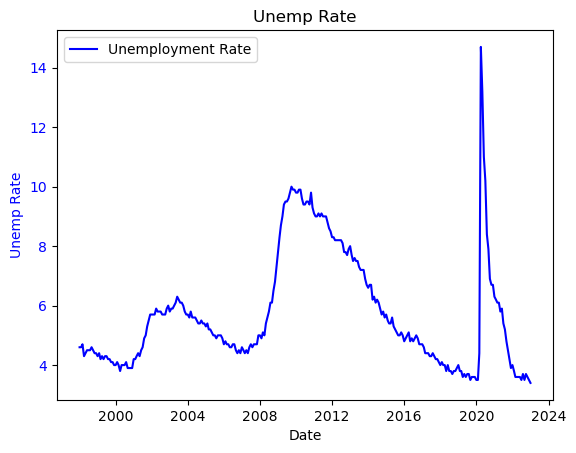

In [43]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
ax1.plot(unrate["date"],unrate["value"], color='blue', label='Unemployment Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemp Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Add legends
ax1.legend(loc='upper left')


# Set the title
plt.title('Unemp Rate')

# Display the graph
plt.show()


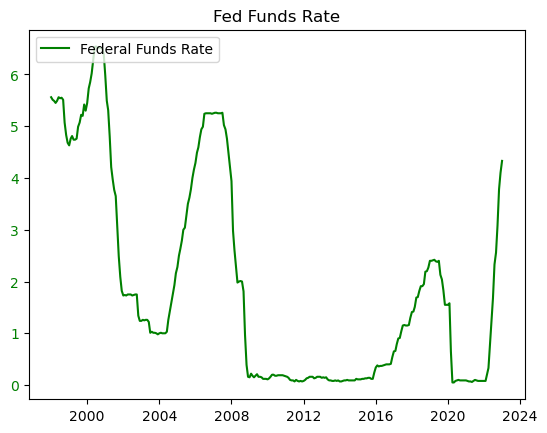

In [44]:


# Plot the third dataset on the primary y-axis (different scale)
plt.plot(ff_data['date'],ff_data['value'], color='green', label='Federal Funds Rate')
ax1.set_ylabel('Fed Funds Rate', color='green')
plt.tick_params(axis='y', labelcolor='green')

# Add legends
plt.legend(loc='upper left')


# Set the title
plt.title('Fed Funds Rate')

# Display the graph
plt.show()


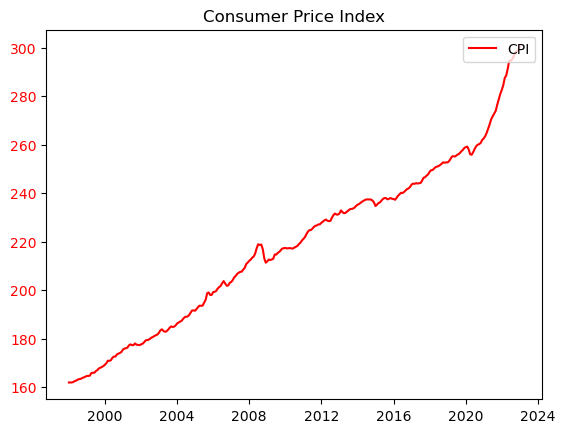

In [45]:
# Create a secondary y-axis for scaling with CPI
ax2 = ax1.twinx() 

# Plot the second dataset on the secondary y-axis
plt.plot(cpi['date'],cpi['value'], color='red', label='CPI')
ax2.set_ylabel('CPI Value', color='red')
plt.tick_params(axis='y', labelcolor='red')

#Add Legends
plt.legend(loc='upper right')

# Set the title
plt.title('Consumer Price Index')

# Display the graph
plt.show()

In [108]:
cpi_scaled_data = {'date': cpi['date'], 'value': cpi['value']/100}
cpi_scaled = pd.DataFrame(cpi_scaled_data)

cpi_scaled_10 = {'date': cpi['date'], 'value': cpi['value']/10}
cpi_scaled_10 = pd.DataFrame(cpi_scaled_10)

print(cpi["value"])
print(cpi_scaled_10["value"])
print(cpi_scaled_data["value"])

0      162.000
1      162.000
2      162.000
3      162.200
4      162.600
        ...   
296    296.539
297    297.987
298    298.598
299    298.990
300    300.536
Name: value, Length: 301, dtype: float64
0      16.2000
1      16.2000
2      16.2000
3      16.2200
4      16.2600
        ...   
296    29.6539
297    29.7987
298    29.8598
299    29.8990
300    30.0536
Name: value, Length: 301, dtype: float64
0      1.62000
1      1.62000
2      1.62000
3      1.62200
4      1.62600
        ...   
296    2.96539
297    2.97987
298    2.98598
299    2.98990
300    3.00536
Name: value, Length: 301, dtype: float64


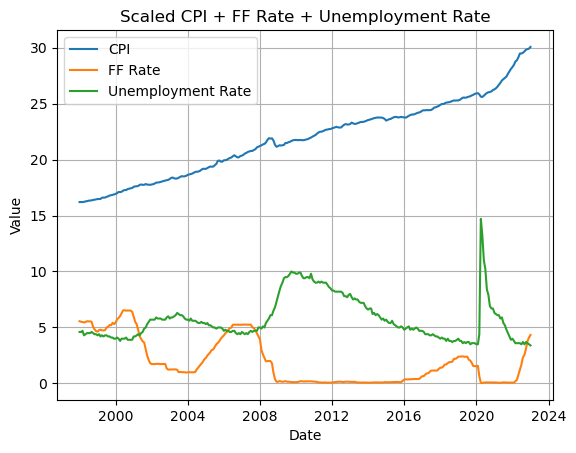

In [109]:




plt.plot(cpi_scaled_10['date'], cpi_scaled_10['value'], label='CPI')
plt.plot(ff_data['date'], ff_data['value'], label='FF Rate')
plt.plot(unrate['date'], unrate['value'], label='Unemployment Rate')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scaled CPI + FF Rate + Unemployment Rate')
plt.legend()
plt.grid(True)

plt.show()

Pearson correlation
Time Lagged Cross Correlation (TLCC) & Windowed TLCC
Dynamic Time Warping (DTW)
Instantaneous phase synchrony

Check Predictive Analytics Stuff?

In [20]:
from scipy.stats import pearsonr

#unrate_values = unrate["value"]
correlation_coefficient, p_value = pearsonr(unrate["value"], cpi["value"])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"p_value: {p_value}")

Correlation Coefficient: 0.04175895744490891
p_value: 0.4704227998948859


In [64]:
merged_data = pd.merge(unrate, ff_data, on='date', suffixes=('_unrate', '_ff'))

merged_data.head(5)

,date,value_unrate,value_ff
0,1998-01-01,4.6,5.56
1,1998-02-01,4.6,5.51
2,1998-03-01,4.7,5.49
3,1998-04-01,4.3,5.45
4,1998-05-01,4.4,5.49


In [92]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf = ccf_values(merged_data['value_unrate'], merged_data['value_ff'])
ccf

array([-2.30600039e-03, -4.39065672e-03, -5.96332725e-03, -7.69804123e-03,
       -8.67720777e-03, -9.20119975e-03, -8.95234887e-03, -8.18051373e-03,
       -6.86209910e-03, -5.22635280e-03, -3.62950847e-03, -1.91292291e-03,
       -2.96486150e-04,  1.58698865e-03,  3.07092051e-03,  4.84402879e-03,
        6.48037480e-03,  8.43799587e-03,  1.05222294e-02,  1.24727699e-02,
        1.45541011e-02,  1.64549873e-02,  1.84861492e-02,  2.04032814e-02,
        2.23746505e-02,  2.46871361e-02,  2.68568991e-02,  2.87412168e-02,
        3.11281061e-02,  3.36441622e-02,  3.63478005e-02,  3.92489131e-02,
        4.17597699e-02,  4.43702493e-02,  4.63803196e-02,  4.75984185e-02,
        4.95749785e-02,  5.13029077e-02,  5.29530272e-02,  5.45019513e-02,
        5.55783347e-02,  5.69395494e-02,  5.79537496e-02,  5.94085530e-02,
        6.06090340e-02,  6.18069154e-02,  6.30214330e-02,  6.41563701e-02,
        6.47284819e-02,  6.46959866e-02,  6.42071993e-02,  6.35460207e-02,
        6.25320229e-02,  

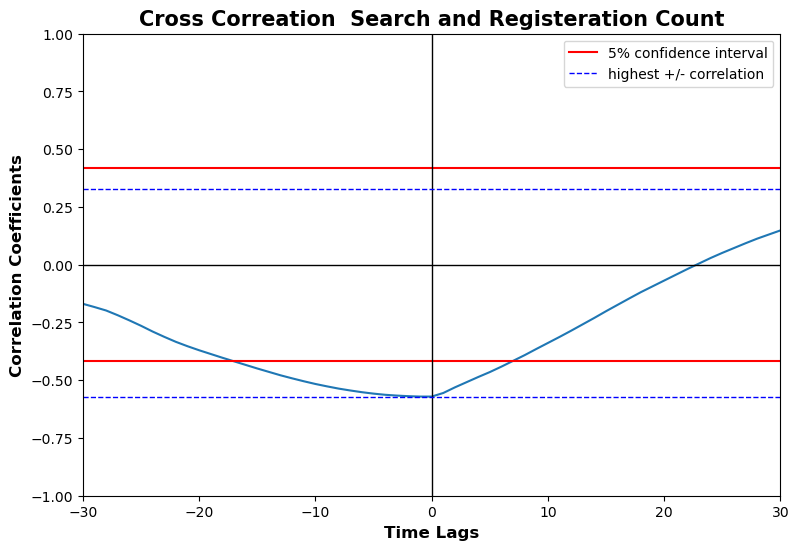

In [102]:
lags = signal.correlation_lags(len(merged_data['value_unrate']), len(merged_data['value_ff']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set(xlim=[-30,30])
    ax.set_title('Cross Correation Search', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf)


289
301


0    4.3
1    4.4
2    4.2
3    4.3
4    4.2
Name: value_unrate, dtype: float64

301
289


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 301 and the array at index 1 has size 289

{12: nan, 13: nan, 14: nan, 15: nan, 16: nan, 17: nan, 18: nan, 19: nan, 20: nan, 21: nan, 22: nan, 23: nan, 24: nan}
